In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import random
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import colors

In [2]:
df = pd.read_csv('dataset/Data_Science_and_STEM_Salaries.csv')
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,150000.0,22000.0,NaN,NaN,11527,819.0,1973,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,73200.0,16000.0,NaN,NaN,11521,819.0,2037,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,25000.0,20000.0,NaN,NaN,11527,819.0,2044,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,57000.0,29000.0,NaN,NaN,7419,807.0,2097,0,0,0,0,0,0,0,0,0,0,NaN,NaN


## 1. clean data

Follow our naming convention

In [4]:
df = df.rename(columns={"totalyearlycompensation": "total_yearly_compensation", 
                        "yearsofexperience": "years_of_experience",
                       "yearsatcompany": "years_at_company",
                        "basesalary": "base_salary",
                        "stockgrantvalue": "stock_grant_value"
                       })
df.head(2)

,timestamp,company,level,title,total_yearly_compensation,location,years_of_experience,years_at_company,tag,base_salary,stock_grant_value,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN


drop some duplicated and useless columns

In [6]:
df = df.drop(columns=['timestamp', 'tag', 'dmaid', 'cityid', 'otherdetails', 'Some_College', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Highschool', 'rowNumber', 'bonus'])
df.head(2)

,company,level,title,total_yearly_compensation,location,years_of_experience,years_at_company,base_salary,stock_grant_value,gender,Race,Education
0,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,NaN,NaN,NaN
1,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,0.0,0.0,NaN,NaN,NaN


handle missing data

In [7]:
missing = df.isna().sum() 

print("The percentage of each feature's missing values are as follow:")
round(missing / len(df) * 100, 2)

The percentage of each feature's missing values are as follow:


company                       0.01
level                         0.19
title                         0.00
total_yearly_compensation     0.00
location                      0.00
years_of_experience           0.00
years_at_company              0.00
base_salary                   0.00
stock_grant_value             0.00
gender                       31.19
Race                         64.20
Education                    51.52
dtype: float64

How do we handle these missing values?

- Less than 0.2% data have missing values for the feature ***company*** and ***level***. We will drop these rows.

- There are 31.19%, 64.2%, and 51.52% missing values in ***gender***, ***race***, and ***education*** columns. They are all categorical values, so we will fill in an 'Unknown' value.


Drop rows with missing values for ***company*** and ***level***

In [8]:
df = df.dropna(subset=['company', 'level'])

Fill in other missing data with 'Unknown' value

In [9]:
df = df.fillna('Unknown')

Note: We will only focus on records with less than 30 years working experience, which means **years_of_experience < 30**

In [10]:
df = df[df['years_of_experience'] < 30]

## 2. Data Exploration Analysis

### 2.1 Relationship with numerical features

array([[<AxesSubplot:xlabel='total_yearly_compensation', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='years_of_experience', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='years_at_company', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='base_salary', ylabel='total_yearly_compensation'>,
        <AxesSubplot:xlabel='stock_grant_value', ylabel='total_yearly_compensation'>],
       [<AxesSubplot:xlabel='total_yearly_compensation', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='years_of_experience', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='years_at_company', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='base_salary', ylabel='years_of_experience'>,
        <AxesSubplot:xlabel='stock_grant_value', ylabel='years_of_experience'>],
       [<AxesSubplot:xlabel='total_yearly_compensation', ylabel='years_at_company'>,
        <AxesSubplot:xlabel='years_of_experience', ylabel='years_at_company'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


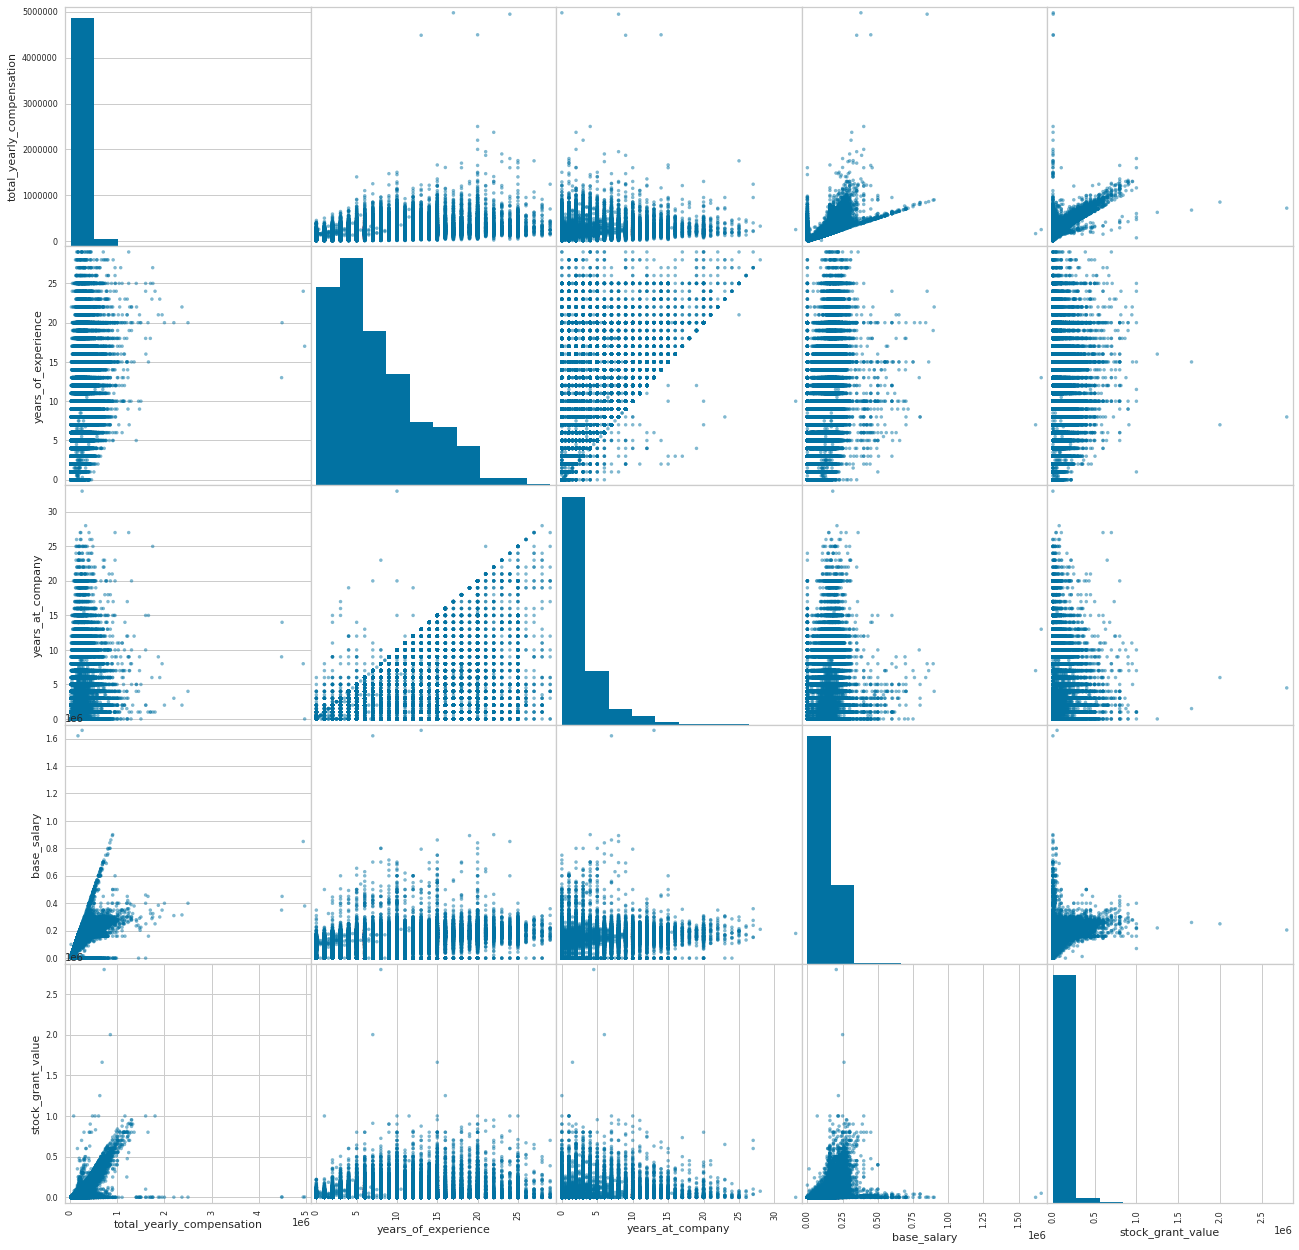

In [11]:
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(22,22))

From the output above, we can find:
- There are some **outliers** in our dataset: 
    - total_yearly_compensation > 4000000
    - base_salary > 1600000 
    - years_at_company > years_of_experience
    - stock_grant_value > 2500000


- There is **no linear relationship** between **working experience**(years_of_experience, years_at_company) and **salary**(total_yearly_compensation, base_salary, stock_grant_value)

- ***total_yearly_compensation***  has a linear relationship between ***stock_grant_value***


**Remove outliers**

total_yearly_compensation > 4000000

In [12]:
# keep rows with total_yearly_compensation < 4000000
df = df[df['total_yearly_compensation'] < 4000000]

base_salary > 1600000

In [13]:
# keep rows with base_salary < 1600000
df = df[df['base_salary'] < 1600000]

stock_grant_value > 2500000

In [14]:
# keep rows with stock_grant_value < 2500000
df = df[df['stock_grant_value'] < 2500000]

years_at_company > years_of_experience

In [15]:
# years_at_company should be less than years_of_experience
df = df[df['years_at_company'] < df['years_of_experience']]

### 2.3 Relationship with categorical features 

In [16]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['company', 'level', 'title', 'location', 'gender', 'Race', 'Education']

Exploring the unique values in the categorical features to get a clear idea of the data.

In [17]:
for column in object_cols:
    print(f"Total categories in the feature '{column}':\n", df[column].value_counts(), '\n-------------------------------------')

Total categories in the feature 'company':
 Amazon            6046
Microsoft         3342
Google            3111
Facebook          2315
Apple             1524
                  ... 
Aruba networks       1
VolksWagen           1
DREAM11              1
HP inc               1
Red hat              1
Name: company, Length: 1526, dtype: int64 
-------------------------------------
Total categories in the feature 'level':
 L5                                         3895
L4                                         3508
L6                                         2550
L3                                         2060
Senior Software Engineer                   1190
                                           ... 
Strategic Advancement Advisor                 1
LL6                                           1
Senior Manager, product management (M5)       1
TLM                                           1
CL 10                                         1
Name: level, Length: 2349, dtype: int64 
-----------

There is a mistake in the column 'gender', which value is 'Senior Software Engineer'. We simply change its value to 'Unknown'

In [18]:
index = df[df['gender'] == 'Title: Senior Software Engineer'].index
df.at[index, "gender"] = 'Unknown'

Relationship with ***Education***

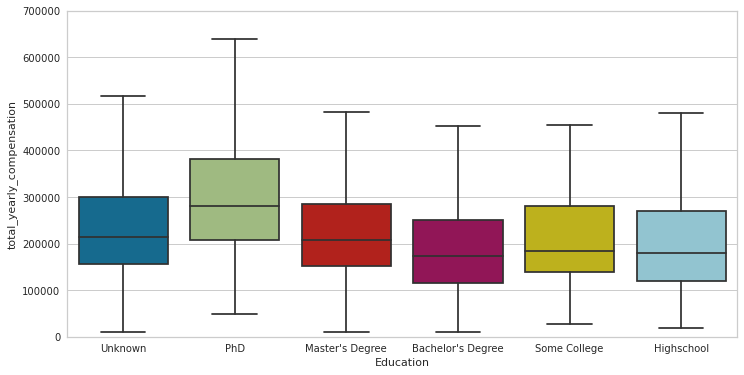

In [19]:
# box plot Education/total_yearly_compensation
var = 'Education'
f, ax = plt.subplots(figsize=(12, 6))
fig = sns.boxplot(x=var, y="total_yearly_compensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=700000);

From the boxplots above, we can find that the total_yearly_compensation for **PhD** are the highest in all metrics

but to my surprise, the **bachelor** degree is the lowest among all education categories, even lower than **High school**

Relationship with ***gender***

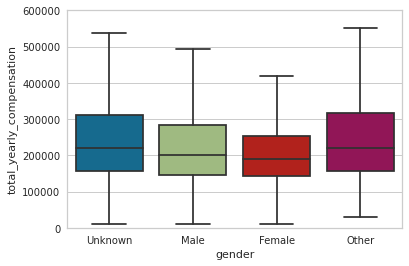

In [20]:
# box plot gender/total_yearly_compensation
var = 'gender'
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x=var, y="total_yearly_compensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=600000);

Ignore the 'Unkown' and 'Other', we find that the total_yearly_compensation for **Feamle** is lower than that for the **Male** 

Relationship with ***Race***

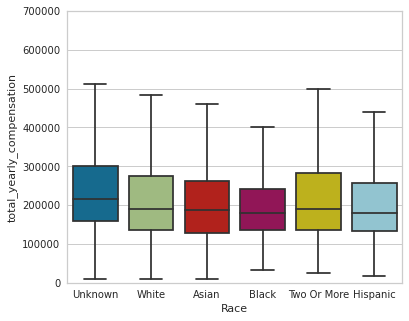

In [21]:
# box plot Race/total_yearly_compensation
var = 'Race'
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.boxplot(x=var, y="total_yearly_compensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=700000);

Black has the highest Q0 value (0th percentile or Minimum) , but the lowest Q1(First quartile), Q2(Median), Q3(Third quartile), and Q4(Maximum)

Relationship with ***company***

There are too many companies in our dataset, so we just show some of them in our boxplot

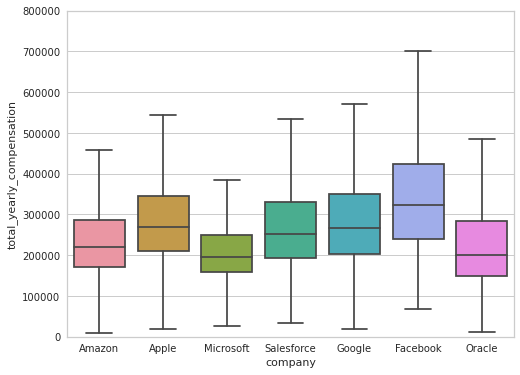

In [22]:
# box plot company/total_yearly_compensation
# select 7 companies
df_company = df[(df['company'] == 'Amazon') | (df['company'] == 'Microsoft') | (df['company'] == 'Google')
       | (df['company'] == 'Facebook') | (df['company'] == 'Apple') | (df['company'] == 'Oracle') | (df['company'] == 'Salesforce')]

var = 'company'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="total_yearly_compensation", data=df_company, showfliers = False)
fig.axis(ymin=0, ymax=800000);

Facebook's ***total_yearly_compensation*** is leading in the data science and STEM industry. 

The Q1(25th Percentile) value of 'Facebook' is even higher than the maximum value of 'Microsoft company'. 

Just to be curious, What're differences between employees in 'Facebook' and 'Microsoft'?

**Facebook VS. Microsoft - years_of_experience**

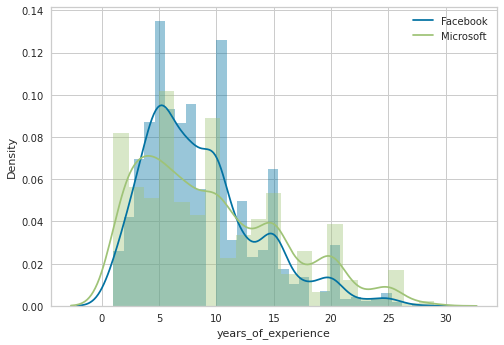

In [23]:
facebook = df[df['company'] == 'Facebook']
microsoft = df[df['company'] == 'Microsoft']
sns.distplot(facebook['years_of_experience'])
sns.distplot(microsoft['years_of_experience'])

plt.legend(['Facebook', 'Microsoft'])
plt.show()

The ***years_of_experience*** for Facebook and Microsoft have similar data distribution. 

**Facebook VS. Microsoft - Education**

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


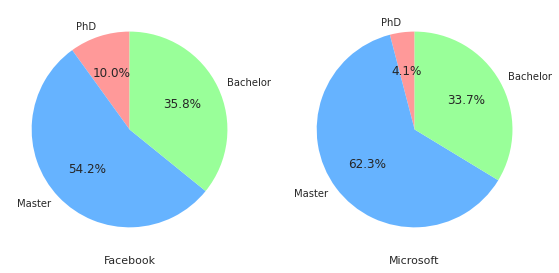

In [24]:
import matplotlib.pyplot as plt
# Pie chart
labels = ['PhD', 'Master', 'Bachelor']
education_facebook = [len(facebook[facebook['Education'] == 'PhD']), len(facebook[facebook['Education'] == 'Master\'s Degree']), len(facebook[facebook['Education'] == 'Bachelor\'s Degree'])]
education_microsoft = [len(microsoft[microsoft['Education'] == 'PhD']), len(microsoft[microsoft['Education'] == 'Master\'s Degree']), len(microsoft[microsoft['Education'] == 'Bachelor\'s Degree'])]
# colors
colors_pie = ['#ff9999','#66b3ff','#99ff99']
 
# fig1, ax1 = plt.subplots()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
ax1.pie(education_facebook, colors = colors_pie, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.pie(education_microsoft, colors = colors_pie, labels=labels, autopct='%1.1f%%', startangle=90)

ax1.set(xlabel='Facebook')
ax2.set(xlabel='Microsoft')
 
plt.tight_layout()
plt.show()

The percentage of employees with **PhD** degree in Facebook(10.0%) is significantly higher than that in Microsoft(4.1%), 

while Microsoft has more employees with **Master** degree

Relationship with ***title***

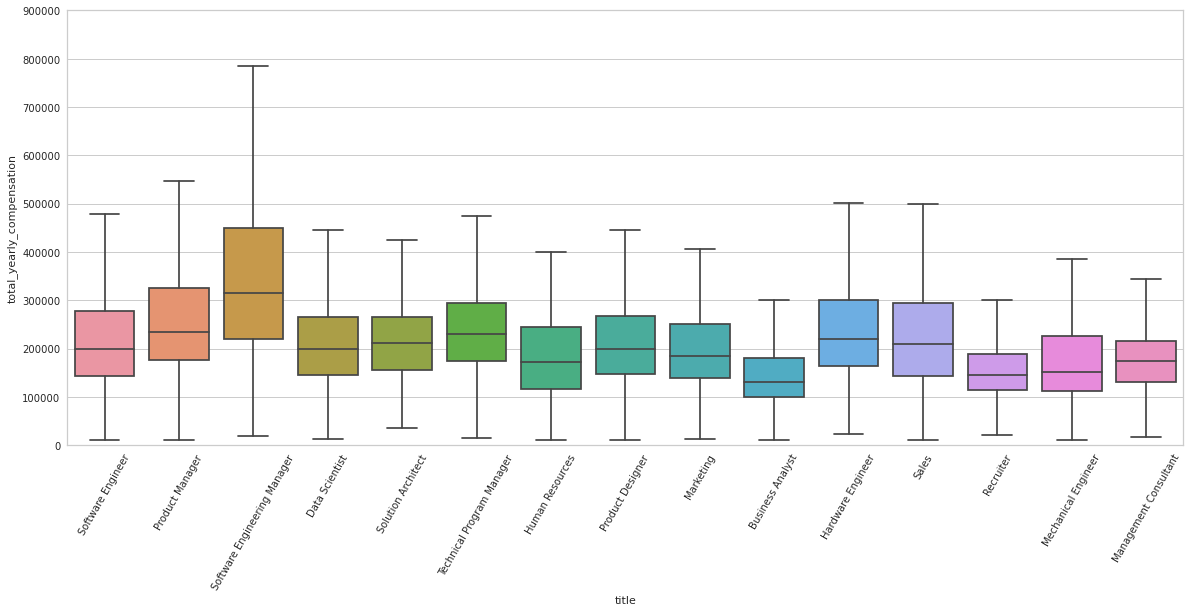

In [25]:
# box plot company/total_yearly_compensation
var = 'title'
f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=60)
fig = sns.boxplot(x=var, y="total_yearly_compensation", data=df, showfliers = False)
fig.axis(ymin=0, ymax=900000);

**Software Engineering Manager** has the highest values in all metrics. 

The Q1(25th Percentile) value of 'Software Engineering Manager' is even higher than the maximum value of most other job titles

Just to be curious, how manys years of working experience we need to be a software engineering manager?

<AxesSubplot:xlabel='years_of_experience', ylabel='Density'>

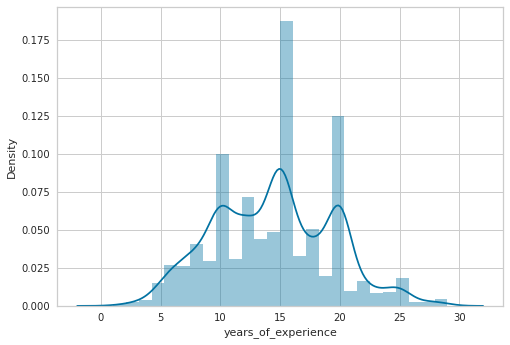

In [26]:
software_engineering_manager = df[df['title'] == 'Software Engineering Manager']
sns.distplot(software_engineering_manager['years_of_experience'])

Most 'Software Engineering Manager' has 10~20 years working experience

### 2.4 In summary
We can conclude that:

- ***Education*** and job ***title*** have stronger impact on  ***total_yearly_compensation***. People with 'PhD' degree or working as 'Software Engineering Manager' tend to have higher ***total_yearly_compensation***

- Facebook's ***total_yearly_compensation*** is leading in the data science and STEM industry. 

- Most 'Software Engineering Manager' has 10~20 years working experience

## 3. Feature Engineering

The following steps are applied to preprocess the data:

- Label encoding the categorical features
- Scaling the features using the standard scaler


### label encoding

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44451 entries, 1 to 62640
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company                    44451 non-null  object 
 1   level                      44451 non-null  object 
 2   title                      44451 non-null  object 
 3   total_yearly_compensation  44451 non-null  int64  
 4   location                   44451 non-null  object 
 5   years_of_experience        44451 non-null  float64
 6   years_at_company           44451 non-null  float64
 7   base_salary                44451 non-null  float64
 8   stock_grant_value          44451 non-null  float64
 9   gender                     44451 non-null  object 
 10  Race                       44451 non-null  object 
 11  Education                  44451 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 5.4+ MB


From the output above, we can see：
- There are no missing values anymore (missing values have been solved previously)
- There are some categorical features in our data frame; as there are some features in dtype: object. So we will need to encode them into numeric forms later.

In [28]:
# gender
le_gender = LabelEncoder()
df['gender']=df[['gender']].apply(le_gender.fit_transform)

# Race
le_race = LabelEncoder()
df['Race']=df[['Race']].apply(le_race.fit_transform)

# Education
le_education = LabelEncoder()
df['Education']=df[['Education']].apply(le_education.fit_transform)

# company
le_company = LabelEncoder()
df['company']=df[['company']].apply(le_company.fit_transform)
# list(le_company.inverse_transform([5, 2, 1]))

# level
le_level = LabelEncoder()
df['level']=df[['level']].apply(le_level.fit_transform)

# title
le_title = LabelEncoder()
df['title']=df[['title']].apply(le_title.fit_transform)

# location
le_title = LabelEncoder()
df['location']=df[['location']].apply(le_title.fit_transform)

### Scaling

In [29]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")

All features are now scaled


In [30]:
scaled_df

,company,level,title,total_yearly_compensation,location,years_of_experience,years_at_company,base_salary,stock_grant_value,gender,Race,Education
0,1.923541,0.901004,0.408834,-0.961699,0.678348,-0.683398,0.171207,-2.305114,-0.675311,1.401734,0.412792,0.904819
1,-1.310077,-0.049233,-0.548971,0.527969,0.810504,-0.135283,-0.857690,0.154412,-0.675311,1.401734,0.412792,0.904819
2,-1.236363,0.148812,0.728102,0.967776,0.979828,-0.317988,0.857138,0.186148,1.352900,1.401734,0.412792,0.904819
3,0.456618,-1.595512,0.408834,-0.557360,-0.031988,-0.683398,0.171207,-2.305114,-0.675311,1.401734,0.412792,0.904819
4,0.456618,-1.576469,0.728102,0.457033,0.509024,1.143651,2.914931,0.551110,0.057099,1.401734,0.412792,0.904819
...,...,...,...,...,...,...,...,...,...,...,...,...
44446,-1.310077,-0.140639,0.408834,-0.160116,0.810504,-0.500693,0.514173,0.035403,-0.247133,1.401734,0.412792,0.904819
44447,1.923541,-0.984237,-0.868239,-0.450956,0.682478,-0.866103,-0.171759,-0.051871,-0.506293,1.401734,0.412792,0.904819
44448,-0.152757,2.074043,0.408834,0.648561,0.810504,0.230127,-0.514724,0.154412,1.014865,1.401734,0.412792,0.904819
44449,0.299360,-1.580277,0.408834,-0.110460,0.810504,0.960946,3.257897,0.186148,-0.393615,1.401734,0.412792,0.904819


## 4. Dimensionality Reduction

In this problem, there are many factors on the basis of which the final classification will be done.

We will perform dimensionality reduction on the selected features before putting them through a classifier.

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**In this section, we will:**

- Dimensionality reduction with PCA
- Plotting the reduced dataframe

For this project, I will be reducing the dimensions to 3.

In [31]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,44451.0,-2.301819e-17,1.646435,-3.883889,-1.103050,-0.258925,0.828966,13.893025
col2,44451.0,-1.790304e-17,1.300858,-2.377795,-1.053673,-0.130809,1.037518,4.803836
col3,44451.0,1.310758e-17,1.147052,-6.193530,-0.804255,-0.161893,0.601706,7.050529


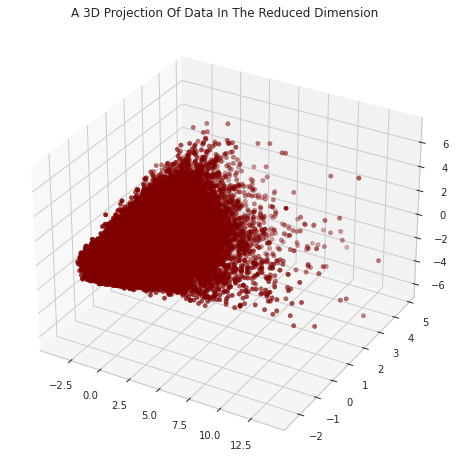

In [32]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## 5. Clustering

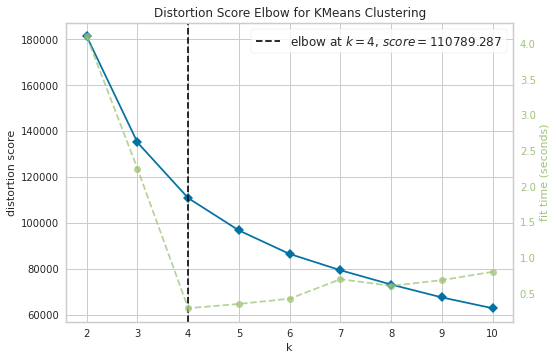

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
## print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [34]:
# Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC
scaled_df["Clusters"]= yhat_AC

In [35]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

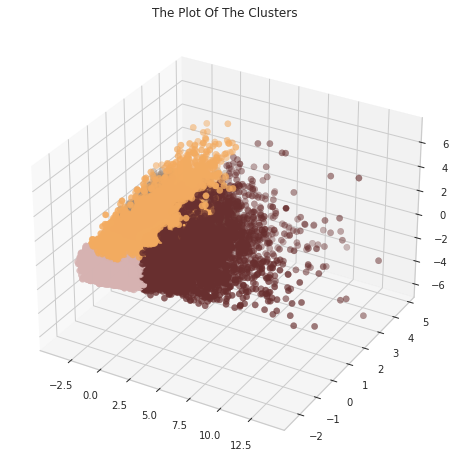

In [36]:
# # Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## 6. Clusters Visualisation

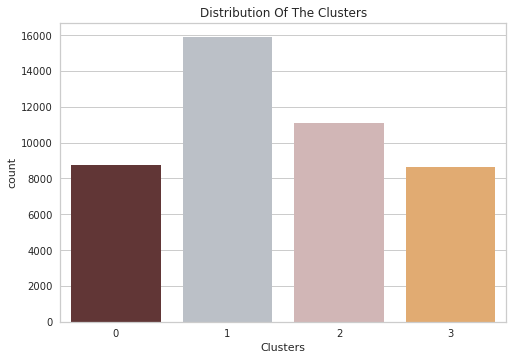

In [37]:
# Plotting countplot of clusters
pal = ["#682F2F", "#B9C0C9", "#D6B2B1", "#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

**years_at_company** VS. **base_salary**

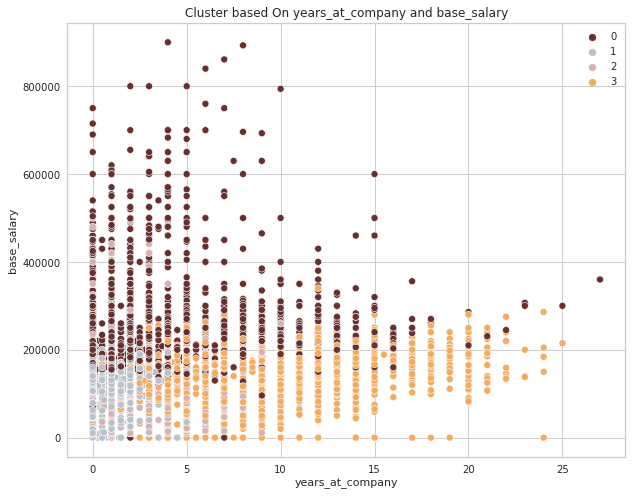

In [47]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = df,x=df["years_at_company"], y=df["base_salary"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster based On years_at_company and base_salary")
plt.legend()
plt.show()

- Cluster 0: high **base_salary**, low and average **years_at_company**
- Cluster 1: low **base_salary**, low **years_at_company**
- Cluster 3: low **base_salary**, average and high **years_at_company**

**years_at_company** VS. **total_yearly_compensation**

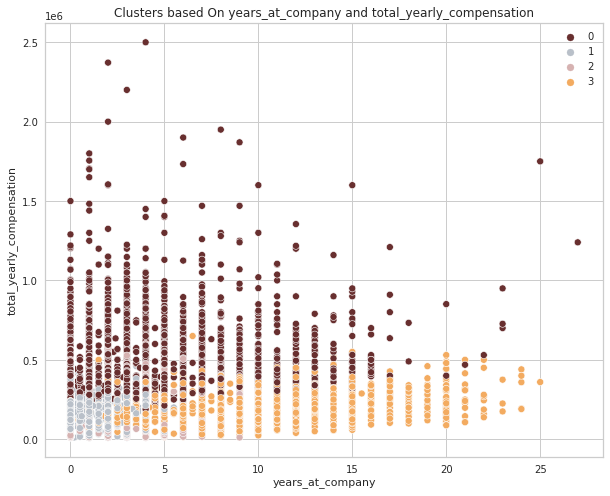

In [48]:
fig = plt.figure(figsize=(10,8))

pl = sns.scatterplot(data = df,x=df["years_at_company"], y=df["total_yearly_compensation"],hue=df["Clusters"], palette= pal)
pl.set_title("Clusters based On years_at_company and total_yearly_compensation")
plt.legend()
plt.show()

- Cluster 0: high **total_yearly_compensation**, low and average **years_at_company**
- Cluster 1: low **total_yearly_compensation**, low **years_at_company**
- Cluster 3: low **total_yearly_compensation**, average and high **years_at_company**